# Задача 13
## Исследование длины и ширины 139 черепов, найденных в Верхнем Египте и относимых к расе, жившей за 8000 лет до нашей эры, показало, что стандартное отклонение длины и ширины черепа 5,722 и 4,612 мм соответственно. Те же величины, выведенные на основании обследования 1000 европейцев, оказались равными 6,161 и 5,055 мм. Предполагая, что законы распределения длины и ширины черепа нормальные, выяснить, можно ли считать расхождение стандартов случайным. Построить график мощности критерия.

### ${\xi_1 \sim N(a_1, \phi_1 ^2)}$,  ${\eta_1 \sim N(b_1, \psi_1 ^2)}$; ${n_1 = 139}$
### ${\xi_2 \sim N(a_2, \phi_2 ^2)}$,  ${\eta_2 \sim N(b_2, \psi_2 ^2)}$; ${n_2 = 1000}$

### ${H_0: \phi_1 ^2 = \phi_1 ^2}$ и ${\psi_1 ^2 = \psi_2 ^2}$
### ${H_1: \phi_1 ^2 ≠ \phi_1 ^2}$ или ${\psi_1 ^2 ≠ \psi_2 ^2}$

### По теореме: Если ${H_0}$ верна, то $${\frac{S_x ^2}{S_y ^2} \sim F(n-1, m-1)}$$

### $${S_x ^2 = \frac{n}{n-1} \sigma_x ^2 }$$

In [66]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
from rich.console import Console
from rich.panel import Panel
from rich.text import Text

console = Console()

alpha = 0.05

n_1 = 139
n_2 = 1000

# Стандартные отклонения

phi_1 = 5.722  # Длина
psi_1 = 4.612  # Ширина

phi_2 = 6.161  # Длина
psi_2 = 5.055  # Ширина

# Среднеквадратические отклонения

phi_1_sqr = phi_1**2
psi_1_sqr = psi_1**2

phi_2_sqr = phi_2**2
psi_2_sqr = psi_2**2

# S

S_phi_1 = (n_1 / (n_1 - 1)) * phi_1_sqr
S_psi_1 = (n_1 / (n_1 - 1)) * psi_1_sqr

S_phi_2 = (n_2 / (n_2 - 1)) * phi_2_sqr
S_psi_2 = (n_2 / (n_2 - 1)) * psi_2_sqr

# Дельты с волной

delta_wave_length = S_phi_1 / S_phi_2
delta_wave_width = S_psi_1 / S_psi_2

# p-value

p_value_length = f.sf(delta_wave_length, n_1 - 1, n_2 - 1)
p_value_width = f.sf(delta_wave_width, n_1 - 1, n_2 - 1)

# Критические значения F

F_crit_lower = f.ppf(alpha / 2, n_1 - 1, n_2 - 1)
F_crit_upper = f.ppf(1 - alpha / 2, n_1 - 1, n_2 - 1)

### $${\tilde{\Delta} = \frac{S_x ^2}{S_y ^2}}$$
### $${\Delta \sim F(n-1, m-1) = F(138, 999)}$$
### $${p-value =  P(\Delta ≥ \tilde{\Delta}  | H_0) = \int_{\tilde{\Delta}}^{+∞} q(t) \, dt}$$

In [67]:
console.print("Для длины:")
console.print(f"Δ_wave = {delta_wave_length}")
console.print(f"p-value = {p_value_length}")

console.print()

console.print("Для ширины:")
console.print(f"Δ_wave = {delta_wave_width}")
console.print(f"p-value = {p_value_width}")

console.print()

console.print(f"Критические значения F: [{F_crit_lower}, {F_crit_upper}]")

Для длины:

Δ_wave = 0.8679495681936392

p-value = 0.853132311292026

Для ширины:

Δ_wave = 0.8376015637457711

p-value = 0.905897537508354

Критические значения F: [0.7673823155977318, 1.2716970730369903]

### Все значения ${p-value} ∈ (\frac{\alpha}{2}, 1 - \frac{\alpha}{2}) = (0.025, 0.975)$. Поэтому нет оснований отвергнуть гипотезу ${H_0}$

## Построим график мощности критерия:

### $${W = 1 - P(u_{\frac{\alpha}{2}} ≤ x ≤ u_{1-\frac{\alpha}{2}})}$$

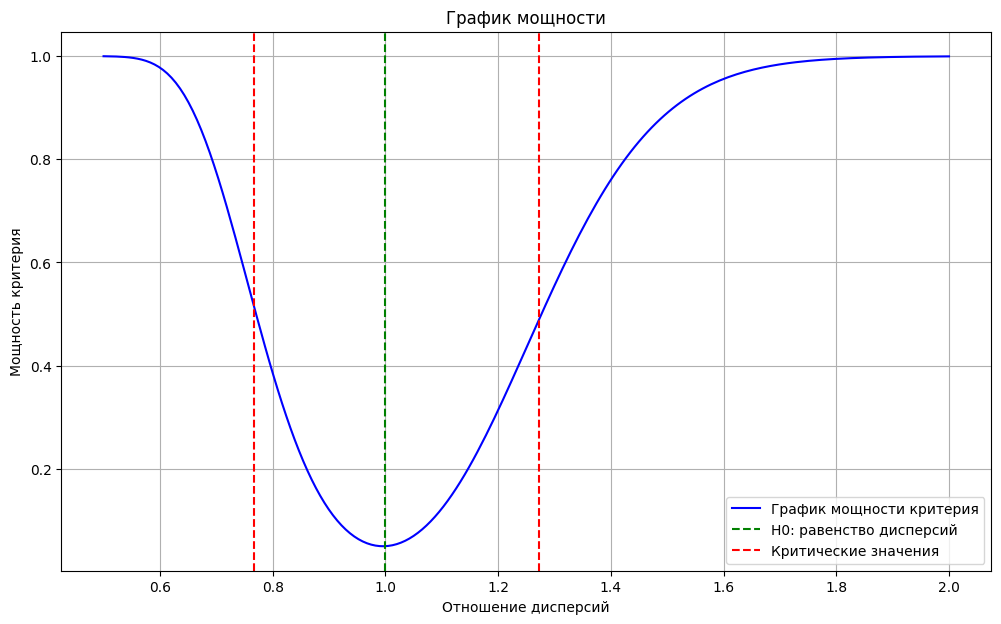

In [68]:
lambda_vals = np.linspace(0.5, 2, 200)
W = 1 - f.cdf(F_crit_upper, n_1 - 1, n_2 - 1, scale=lambda_vals) + f.cdf(F_crit_lower, n_1 - 1, n_2 - 1, scale=lambda_vals)

plt.figure(figsize=(12, 7))
plt.plot(lambda_vals, W, label="График мощности критерия", color="blue")
plt.axvline(x=1, color="green", linestyle="--", label="H0: равенство дисперсий")
plt.axvline(x=F_crit_lower, color="red", linestyle="--", label="Критические значения")
plt.axvline(x=F_crit_upper, color="red", linestyle="--")
plt.xlabel("Отношение дисперсий")
plt.ylabel("Мощность критерия")
plt.title("График мощности")
plt.legend()
plt.grid()
plt.show()